<a href="https://colab.research.google.com/github/HassanButt2019/YOLOV4_Analyzing_Image_Data_Set/blob/main/YOLOV4_Analyzing_Image_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Indented block

> Indented block

> Indented block







#**Section 0:** **YOLOV4 Analyzing Image Data Set**

This guide serves as a starting point for diving into deep learning object detection. However, bear in mind that object detection is a complex field with nuanced details, impossible to cover entirely in one blog post.

### Content

1. Data Overiew and Sources
2. Library Imports and Setup
3. Yolo v4 and Installation
4. Image Processing
5. Data Exploration and Visualization
6. Object Detection
7. Dimensionality Reduction and Anomaly Detection
8. Machine Learning Models and Predictions
9. Implementation and Visualization of Traning Data
10. Implementation and Visualization of Test Data
11. Results
12. Conclusion

###**Object detection in action**
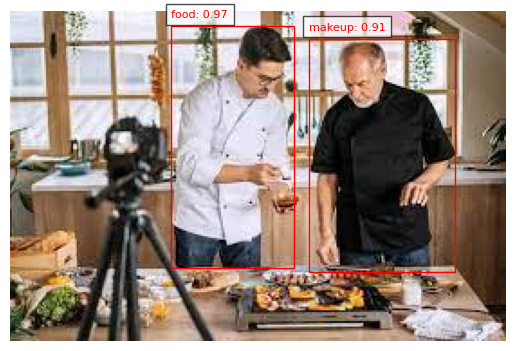

### **Detecting Objects in Computer Vision**
Every day, we effortlessly recognize objects around us. But for computers, this task demands a sophisticated approach. Detecting objects involves analyzing an input image or video frame to identify objects and their positions—a process termed classification and localization in computer vision.

Various solutions exist to aid computers in object detection. Today, our focus is on YOLO, a cutting-edge algorithm known for its exceptional accuracy and real-time performance. We'll delve into understanding and training this algorithm using TensorFlow / Keras on a personalized dataset.

Let's start by exploring what YOLO is and its notable features.

##### **1. What is Yolo?**
Yolo employs convolutional neural networks to perform object detection. Object detection offers more than recognition algorithms by not just identifying object types but also pinpointing their specific locations within an image.

####YOLO compared to other detectors
While YOLO also employs a convolutional neural network (CNN), its real-time object detection capability sets it apart. Unlike slower algorithms like Faster R-CNN that follow a two-stage approach, YOLO predicts in a single stage.

In the two-stage approach, regions of interest are initially identified in the image, followed by classification using a CNN. This process is time-intensive, contributing to slower detection. YOLO, on the other hand, predicts bounding boxes and classes for the entire image in a single pass without the need for selecting specific regions.

The efficiency of YOLO becomes evident when compared to other widely used detectors.

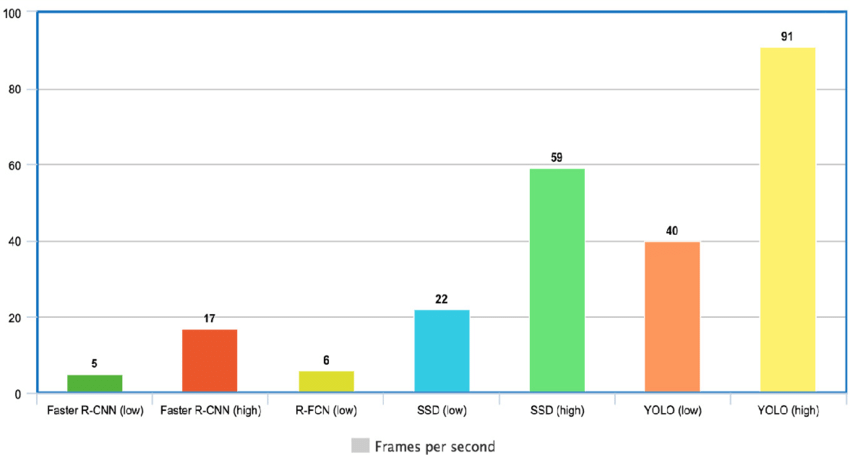


Harnessing the prowess of YOLO (You Only Look Once), I embarked on a quest to scrutinize various machine learning models. Through meticulous evaluation, these models were rigorously tested to unveil their accuracy in detecting objects. The results stand as follows:

**Support Vector Machine (SVM):** 66.76%

**Naive Bayes:** 53.35%

**Decision Tree:** 66.20%

**Random Forest:** 67.04%

**K-Nearest Neighbors (KNN):** 66.48%

**Logistic Regression:** 66.76%

**AdaBoost:** 53.35%


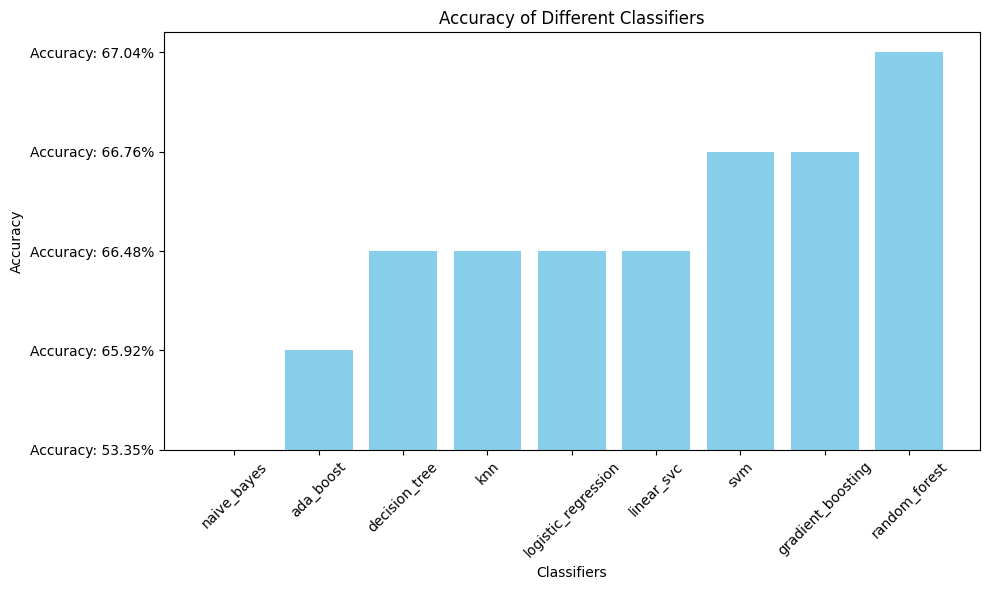

These figures encapsulate the accuracy achieved by each model within the realm of object detection, within the context of YOLO's powerful framework. Join me on this exploration, as we delve into the capabilities and nuances of these algorithms in the intricate landscape of object detection.



#**Section 1:** **Data Overview and Sources**

The dataset utilized for this analysis encompasses 1820 images categorized into five distinct classes: photography, music, food, makeup, and sports. The distribution across these categories is as follows:

Sports: 416 images
Makeup: 360 images
Music: 578 images
Food: 384 images
Photography: 90 images

**Sources of Data**

The images used for this analysis were collected from various reputable sources to ensure a diverse and comprehensive dataset.
These sources include:

1.   Google Images
2.   Kaggle
3.   Data World

**Data Collection Process**

The data collection process involved meticulous curation and filtering to ensure the quality and relevance of the images for each category. This included:

**Keyword-based searches:** Using specific keywords related to each category, images were searched and collected from Google Images, filtering for high-quality and relevant visuals.

**Dataset verification:** Datasets sourced from platforms like Kaggle and Data World underwent scrutiny to select images meeting the criteria for each category.


To access the data from the shared [Google Drive folder](https://drive.google.com/drive/folders/1g5b3bhDstm4JgOy2WF8YvWJki9fdODfP?usp=sharing):

Click on the Link: Open your web browser and click on the link you provided: Shared Google Drive Folder.

Download the Data: To download the dataset or specific files:

Right-click on the file you want to download.
Select "Download" from the dropdown menu.
Save the file(s) to your local system or Google Drive, as needed.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


#**Section 2:** **Library Import and Setup**

In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import PIL.Image
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import cosine_similarity
import random
import string
from PIL import Image
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib.patches as patches
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report


**Mount Your Google Drive**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Section 3:** **Download YOLOv4**

YOLOv4 stands for You Only Look Once version 4. It is a real-time object detection model developed to address the limitations of previous YOLO versions like YOLOv3 and other object detection models.


To access the necessary files for YOLOv4 object detection, please follow these steps to download the weight file, configuration file, and label file:

Click on the following link to access the Google Drive folder: [YOLOv4 Files](https://drive.google.com/drive/folders/1fbLwPZB4FFkoTD-AQs3cjZp-7mZlUFoY?usp=sharing).

Once the Google Drive folder opens, you'll find the required files:

**yolov4.weights:** YOLOv4 pre-trained weights file

**yolov4.cfg:** YOLOv4 configuration file

**coco.names:** Label file containing class names

To download each file, right-click on the file name and select "Download" from the dropdown menu.

Save these files to your Google Drive in a directory of your choice.

Update the file paths in your code to point to the downloaded files' locations on your machine.

In [ ]:
weight_file = "/content/drive/MyDrive/yolov33/yolov4.weights"
cfg_file = "/content/drive/MyDrive/yolov33/yolov4.cfg"
label_file = "/content/drive/MyDrive/yolov33/coco.names"

# **Section 3: Image Processing**
Image processing involves the use of algorithms and techniques to modify, analyze, or extract information from digital images. It includes tasks like enhancing image quality, extracting features, and preparing images for analysis or interpretation in fields such as computer vision and machine learning.

#### **Functions for Image Processing:**
##### **get_images_from_directory(directory_path)**
######**Description:** Gathers file paths of images within a specified directory and its subdirectories.
######**Purpose:** Enables collecting images for further processing or analysis.
**convert_images_to_jpeg(directory)**
######**Description:** Converts images in a specified directory to the JPEG format.
######**Purpose:** Standardizes image formats, converting them to JPEG while managing file extensions.
**readImage(path, img_size=224)**
######**Description:** Reads an image from a file path, performs resizing, tensor conversion, and normalization.
######**Purpose:** Preprocesses images to prepare them for machine learning tasks by adjusting their size and pixel values.
**display_images_inGrid(temp_df)**
######**Description:** Visualizes images in a grid layout using Matplotlib subplots.
######**Purpose:** Conveniently displays images for inspection or analysis in a grid format while excluding non-JPEG files.

These functions serve various image processing needs, such as collecting images from directories, converting formats, preparing images for machine learning models, and providing a visual overview of the images in a structured grid layout.

In [ ]:
def get_images_from_directory(directory_path):
    images = []
    for dirname, _, filenames in os.walk(directory_path):
        for filename in filenames:
            images.append(os.path.join(dirname, filename))
    return images

In [ ]:
def convert_images_to_jpeg(directory):
    def generate_random_string(length=8):
        letters = string.ascii_lowercase
        return ''.join(random.choice(letters) for _ in range(length))
    files = os.listdir(directory)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', 'avif', 'webp'))]


    for file_name in image_files:
        file_path = os.path.join(directory, file_name)
        image = Image.open(file_path)
        new_name = generate_random_string() + '.jpeg'
        new_path = os.path.join(directory, new_name)
        image = image.convert("RGB")
        image.save(new_path, "JPEG")
        os.remove(file_path)

        print(f"Converted {file_name} to {new_name}")

    print("All image files have been converted to JPEG.")


In [ ]:
def readImage(path, img_size=224):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    image = PIL.Image.open(path).convert("RGB")
    image = transform(image)

    return image

# **Section 4: Data Exploration and Visualization:**
Data Exploration and Visualization refer to the systematic approach of visually analyzing and understanding datasets to gain insights, patterns, and relationships within the data. It involves employing various visualization techniques to explore, summarize, and present the data in a more understandable and interpretable format.




In [ ]:
def display_images_inGrid(temp_df):
    plt.figure(figsize=(20, 20))
    n = 0
    for i in range(15):
        n += 1
        plt.subplot(5, 5, n)
        plt.subplots_adjust(hspace=0.7, wspace=0.3)
        file_extension = temp_df[i].split('/')[-1].split('.')[-1]
        img_cat =  temp_df[i].split('/')[-2]
        if file_extension != "jpeg":
          continue
        image = readImage(temp_df[i])
        image = image.permute(1, 2, 0).numpy()
        plt.imshow(image)


In [ ]:
def visualize_bounding_boxes(image_path, bounding_boxes, class_labels, confidence_scores):
    image = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(image)
    for i, box in enumerate(bounding_boxes):
        x, y, w, h = box
        label = class_labels[i]
        confidence = confidence_scores[i]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        text = f'{label}: {confidence:.2f}'
        ax.text(x, y - 5, text, color='red', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

    plt.axis('off')
    plt.show()

In [ ]:
def visualize_category_counts(categories_data):
    category_counts = {category: len(set().union(*labels.values())) for category, labels in categories_data.items()}

    sns.set_palette('pastel')  # Set color palette
    plt.figure(figsize=(8, 6))
    plt.bar(category_counts.keys(), category_counts.values())
    plt.xlabel('Categories')
    plt.ylabel('Number of Unique Categories')
    plt.title('Number of Unique Categories in Different Main Categories')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def visulise_confidence_score(image_path, bounding_boxes, class_labels, confidence_scores):
    # Load the image
    image = cv2.imread(image_path)
    for i, bbox in enumerate(bounding_boxes):
        x_min, y_min, x_max, y_max = bbox
        confidence = confidence_scores[i]
        class_label = class_labels[i]

        # Draw bounding box rectangle
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Display confidence score
        text = f'{class_label}: {confidence:.2f}'
        cv2.putText(image, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with overlay
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(image)

In [ ]:
def visualize_class_specific(image_path, bounding_boxes, class_labels, confidence_scores):
    # Load image using PIL
    image = Image.open(image_path)

    class_boxes = {}
    for i, label in enumerate(class_labels):
        if label not in class_boxes:
            class_boxes[label] = []
        class_boxes[label].append(bounding_boxes[i])

    for class_label, boxes in class_boxes.items():
        fig, ax = plt.subplots()
        ax.imshow(image)
        ax.set_title(f'Detections for {class_label}')

        for box in boxes:
            x, y, w, h = box
            confidence = confidence_scores[i]

            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

            text = f'{class_label}: {confidence:.2f}'
            ax.text(x, y - 5, text, color='red', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

        plt.axis('off')
        plt.show()

# **Section 5: Object Detection**
Object detection is a key aspect of computer vision, aiming to identify and locate multiple objects within images. In this section:

**YOLOv4 Model:**

**Function:** Detects objects in real-time using deep convolutional layers.
Components: Pre-trained model, weights, configuration, and label files (yolov4.weights, yolov4.cfg, coco.names).
Functions:

**detect_objects:** Identifies objects in an image using YOLOv4.
detect_objects_for_boundingBox: Detects objects and provides bounding boxes with confidence scores.

**visualize_bounding_boxes:** Visualizes detected objects with bounding boxes and labels.

**visulise_confidence_score:** Displays object detection with confidence scores.

**visualize_class_specific:** Visualizes objects grouped by class with bounding boxes.

Purpose: Enables automated object identification and localization, crucial in various applications like surveillance, autonomous vehicles, and image analysis.

In [ ]:
def detect_objects(image_path, weights_path, config_path, label_path):
    net = cv2.dnn.readNet(weights_path, config_path)
    classes = []
    with open(label_path, "r") as f:
        classes = [line.strip() for line in f.readlines()]

    image = cv2.imread(image_path)
    height, width, _ = image.shape
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layer_outputs = net.forward(output_layers_names)
    boxes = []
    confidences = []
    class_ids = []

    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.6:
                center_x, center_y, w, h = (detection[:4] * np.array([width, height, width, height])).astype(int)
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.6, 0.4)
    detected_objects = []
    if len(indexes) > 0:
        for i in indexes.flatten():
            label = str(classes[class_ids[i]])
            detected_objects.append(label)

    return set(detected_objects)

In [ ]:
def detect_objects_for_boundingBox(image_path, weights_path, config_path, label_path):
    net = cv2.dnn.readNet(weights_path, config_path)
    classes = []
    with open(label_path, "r") as f:
        classes = [line.strip() for line in f.readlines()]
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layer_outputs = net.forward(output_layers_names)
    boxes = []
    confidences = []
    class_ids = []

    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.6:
                center_x, center_y, w, h = (detection[:4] * np.array([width, height, width, height])).astype(int)
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Non-max suppression to get rid of overlapping boxes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.6, 0.4)
    detected_objects = []
    bounding_boxes = []
    if len(indexes) > 0:
        for i in indexes.flatten():
            label = str(classes[class_ids[i]])
            detected_objects.append(label)
            bounding_boxes.append(boxes[i])

    return bounding_boxes , confidences , class_ids , classes


#**Section 6: Dimensionality Reduction and Anomaly Detection**

**What is PCA ?**

PCA (Principal Component Analysis) is a technique used to simplify complex datasets. It reduces the number of variables while retaining key information. Key points:

**Dimension Reduction:** Transforms high-dimensional data into a lower-dimensional space.

**Principal Components:** New variables capturing maximum data variance.

**Benefits:** Helps visualize data, speeds up computation, and extracts meaningful patterns.

**Applications:** Data compression, pattern recognition, and image processing.




**What is Anomaly Detection?**

Anomaly detection refers to the process of identifying patterns or instances within data that significantly differ from the norm or expected behavior. Here's a breakdown:

**Overview:**

Objective: Detecting anomalies, deviations, or outliers in datasets.
Focus: Identifying data points that do not conform to expected patterns or behavior.

**Key Concepts:**

**Normal Behavior:**

Defined Norm: The regular or expected behavior within a dataset.
Majority Data: Instances that adhere to typical patterns.

**Anomalies:**

Outliers: Data points that deviate significantly from the norm.
Unusual Instances: Behaviors, events, or values that are rare or unexpected.


In [ ]:
def visualize_pca_images(image_paths):
    images = [Image.open(path) for path in image_paths]
    flattened_images = [resize_and_flatten(img) for img in images]

    pca = PCA(n_components=2)
    pca.fit(flattened_images)
    pca_summary = summarize_pca(pca)
    print(pca_summary)
    reduced = pca.fit_transform(flattened_images)

    plt.scatter(reduced[:, 0], reduced[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization of Images')
    plt.show()

In [ ]:
def visualize_image_anomaly_detection(image_paths, anomaly_threshold):
    # Load and preprocess images
    data = preprocess_images(image_paths)

    # Apply PCA
    pca = PCA(n_components=5)  # Choose number of components
    pca.fit(data)

    reduced = pca.transform(data)
    reconstructed = pca.inverse_transform(reduced)

    reconstruction_error = np.linalg.norm(data - reconstructed, axis=1)

    norm = Normalize(vmin=min(reconstruction_error), vmax=max(reconstruction_error))
    colors = plt.cm.jet(norm(reconstruction_error))

    # Plot the reconstruction error with colormap
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(data)), reconstruction_error, c=colors, label='Reconstruction Error')
    plt.axhline(anomaly_threshold, color='red', linestyle='--', label='Anomaly Threshold')
    plt.xlabel('Data Points')
    plt.ylabel('Reconstruction Error')
    plt.title('Reconstruction Error for Image Anomaly Detection')
    plt.colorbar(plt.cm.ScalarMappable(cmap='jet', norm=norm), label='Reconstruction Error')
    plt.legend()
    plt.show()

#**Section 7:** **Machine Learning Models and Predictions:**


**Support Vector Machine (SVM):**

**Type:** Classification and Regression
**Function:** Finds the best decision boundary (hyperplane) to separate data into classes or predict continuous values.
**Advantages:** Effective in high-dimensional spaces, versatile due to different kernels.

**Naive Bayes:**

**Type:** Classification
**Function:** Probabilistic classifier based on Bayes' theorem assuming independence between features.
**Advantages:** Fast, simple, and effective for text classification and spam filtering.

**Decision Tree:**

**Type:** Classification and Regression
**Function:** Constructs a tree-like structure to make decisions by splitting data based on feature conditions.
**Advantages:** Easy to interpret, handles non-linear relationships.

**Random Forest:**

**Type:** Ensemble Learning (Bagging)
**Function:** Creates multiple decision trees and aggregates their predictions for more robust results.
**Advantages:** Reduces overfitting, handles large datasets well.

**K-Nearest Neighbors (KNN):**

**Type:** Classification and Regression
**Function:** Predicts by finding the majority class or mean of nearest data points.
**Advantages:** Simple and intuitive, adaptable to different problem domains.

**Logistic Regression:**

**Type:** Classification
**Function:** Estimates the probability that an instance belongs to a particular class.
**Advantages:** Efficient, interpretable, works well for binary classification.

**AdaBoost:**

**Type:** Ensemble Learning (Boosting)
**Function:** Combines weak learners into a strong learner by adjusting weights on misclassified instances.
**Advantages:** Improved accuracy, less susceptible to overfitting.


In [ ]:
def predict_category_cosine(original_data, test_data):
    all_labels = set()
    for labels in [labels for images in original_data.values() for labels in images.values()]:
        all_labels.update(labels)

    simplified_data = {}
    for category, images in original_data.items():
        simplified_data[category] = {index: [1 if label in labels else 0 for label in all_labels] for index, labels in images.items()}

    flat_data = []
    image_category_mapping = {}  # To keep track of the original category of each image
    for category, images in simplified_data.items():
        for index, features in images.items():
            flat_data.append(features)
            image_category_mapping[len(flat_data) - 1] = category  # Index corresponds to image category

    features_array = np.array(flat_data)

    results = []
    predicted_categories = []  # Store predicted categories for accuracy calculation
    actual_categories = []  # Store actual categories for accuracy calculation

    for test_category, test_images in test_data.items():
        for test_index, test_features in test_images.items():
            test_image_features = [1 if label in test_features else 0 for label in all_labels]
            similarities = cosine_similarity([test_image_features], features_array)
            predicted_category_index = np.argmax(similarities)
            nearest_category = image_category_mapping[predicted_category_index]
            result = f"The test image {test_category}:{test_index} is predicted to be in the '{nearest_category}' category."
            results.append(result)

            predicted_categories.append(nearest_category)
            actual_categories.append(test_category)  # Store the actual category of the test image

    # Calculate accuracy
    correct_predictions = sum(pred_cat == actual_cat for pred_cat, actual_cat in zip(predicted_categories, actual_categories))
    total_predictions = len(predicted_categories)
    accuracy = correct_predictions / total_predictions * 100 if total_predictions != 0 else 0

    accuracy_result = f"Accuracy: {accuracy:.2f}%"

    return results, accuracy_result

def predict_category_with_classifier(original_data, test_data, classifier_name='svm'):
    X, image_category_mapping = preprocess_data(original_data)
    y = np.array([image_category_mapping[i] for i in range(len(X))])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if classifier_name == 'svm':
        classifier = SVC()
    elif classifier_name == 'naive_bayes':
        classifier = MultinomialNB()
    elif classifier_name == 'decision_tree':
        classifier = DecisionTreeClassifier()
    elif classifier_name == 'random_forest':
        classifier = RandomForestClassifier()
    elif classifier_name == 'knn':
        classifier = KNeighborsClassifier()
    elif classifier_name == 'logistic_regression':
        classifier = LogisticRegression(max_iter=10000)
    elif classifier_name == 'ada_boost':
        classifier = AdaBoostClassifier()
    elif classifier_name == 'gradient_boosting':
        classifier = GradientBoostingClassifier()
    elif classifier_name == 'linear_svc':
        classifier = LinearSVC(max_iter=10000)
    else:
        return [], 'Invalid classifier name'

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100

    accuracy_result = f"Accuracy: {accuracy:.2f}%"

    return y_pred, accuracy_result


#**UTILITY FUNCTIONS**

In [ ]:
def preprocess_images(image_paths):
    images = [np.array(Image.open(path).convert('L').resize((100, 100))) for path in image_paths]
    flattened_images = [img.flatten() for img in images]
    return np.array(flattened_images)

In [ ]:
def show_image_in(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [ ]:
def resize_and_flatten(image):
    size = (100, 100)  # Define the desired size for resizing
    resized_img = image.resize(size).convert('L')  # Convert to grayscale and resize
    return np.array(resized_img).flatten()


In [ ]:
def display_images(image_paths):
    images = [plt.imread(path) for path in image_paths]
    num_images = len(images)
    rows = 2
    cols = 2

    if num_images < rows * cols:
        print("Insufficient images to display in a 2x2 grid.")
        return

    fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
def summarize_pca(pca):
    explained_variance = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance)
    component_loadings = pca.components_
    summary = {
        'Explained Variance': explained_variance,
        'Cumulative Explained Variance': cumulative_explained_variance,
        'Component Loadings': component_loadings,
    }
    return summary

In [ ]:
def process_image_and_predict_category(image_path, weight_file, cfg_file, label_file, data , cat):
    img_name = image_path.split('/')[-1].split('.')[0]
    test_data = {}
    test_data[cat] = {}
    test_data[cat][img_name] = list(detect_objects(image_path, weight_file, cfg_file, label_file))

    results, accuracy = predict_category(data, test_data, classifier_name="random_forest")
    result_info = {'results': results, 'accuracy': accuracy}

    return result_info

In [ ]:
def preprocess_data(original_data):
    # Extract unique labels from the entire dataset
    all_labels = set()
    for labels in [labels for images in original_data.values() for labels in images.values()]:
        all_labels.update(labels)

    # Convert to a simplified dataset
    simplified_data = {}
    for category, images in original_data.items():
        simplified_data[category] = {index: [1 if label in labels else 0 for label in all_labels] for index, labels in images.items()}

    # Flatten the simplified dataset
    flat_data = []
    image_category_mapping = {}  # To keep track of the original category of each image
    for category, images in simplified_data.items():
        for index, features in images.items():
            flat_data.append(features)
            image_category_mapping[len(flat_data) - 1] = category  # Index corresponds to image category

    return np.array(flat_data), image_category_mapping

# **Section 8:** **Implementation and Visualization of Training Data**

In [ ]:
directory_path = '/content/drive/MyDrive/instagramdata'
images = get_images_from_directory(directory_path)

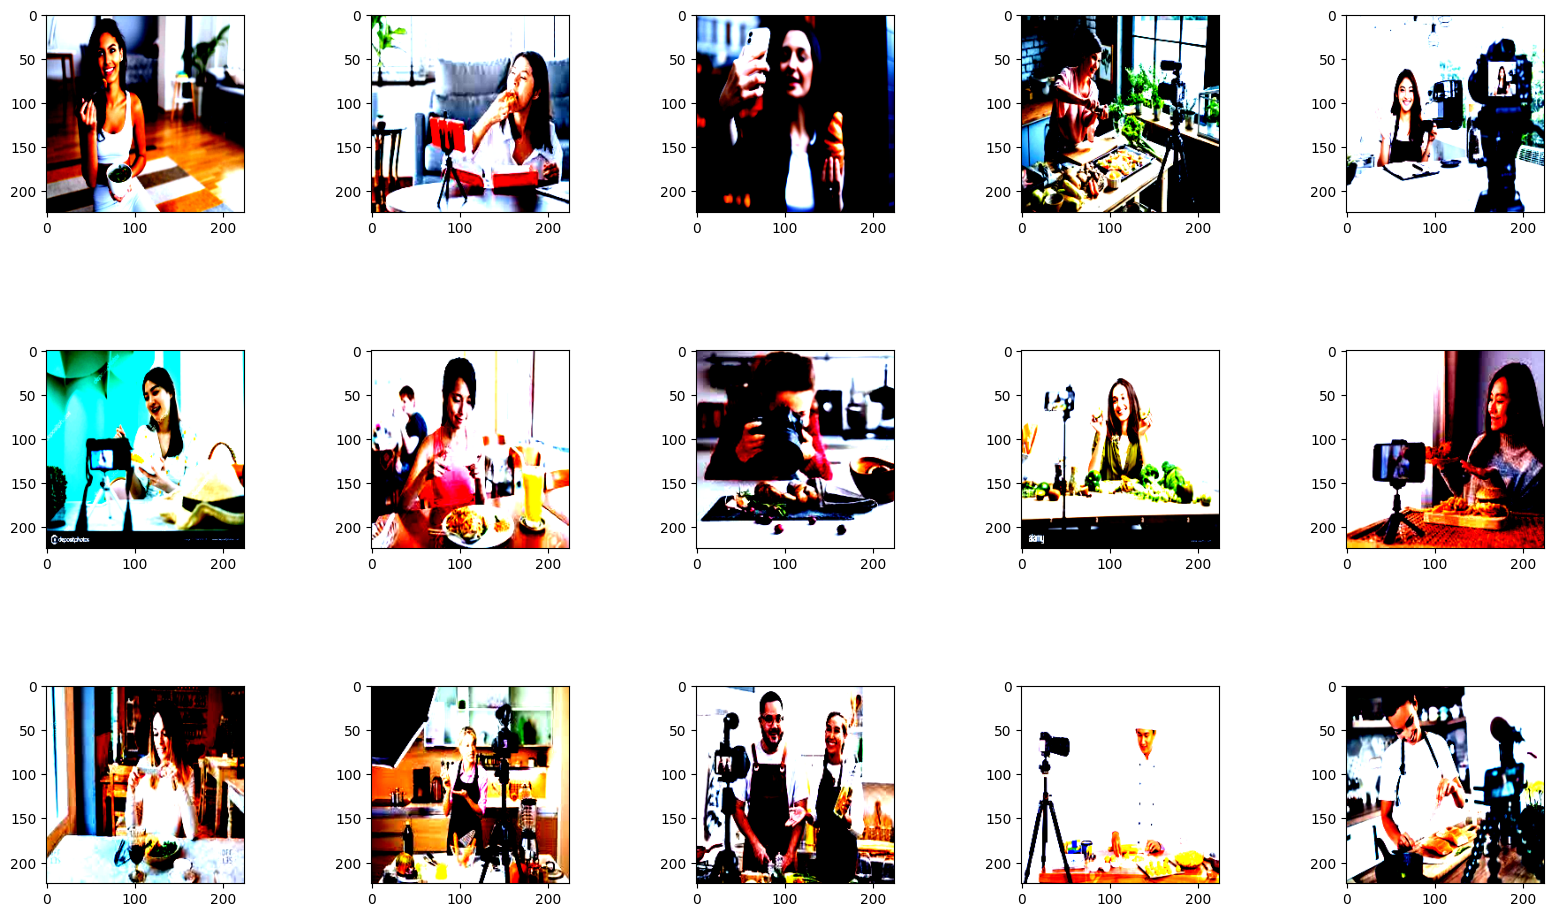

In [ ]:
display_images_inGrid(images)

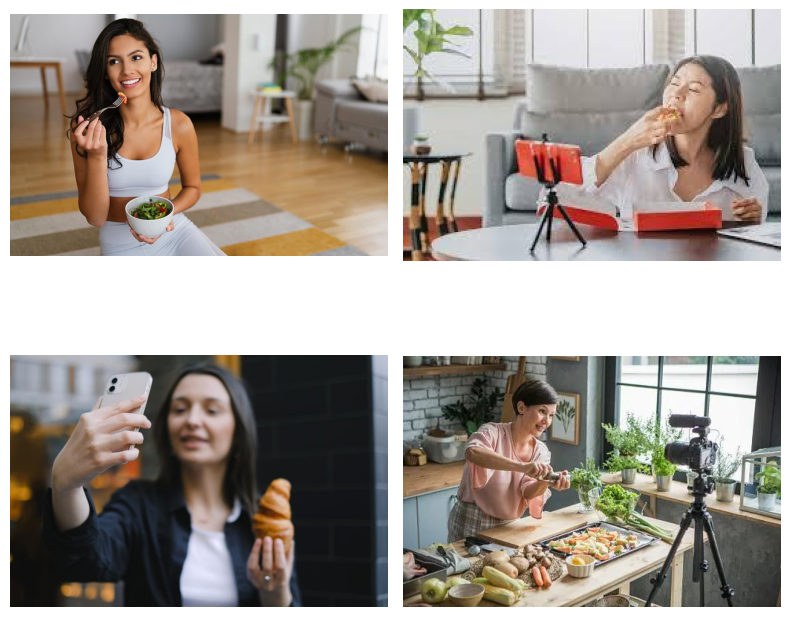

In [ ]:
first_15_items = images[:15]
display_images(first_15_items)

# PCA Implementation and Visualization

**Explained Variance:** It's an array showing the variance explained by each principal component. In this case, the first component explains approximately 31.88% of the variance, and the second component explains about 8.34% of the variance.

**Cumulative Explained Variance:** It's an array that represents the cumulative explained variance up to each principal component. For instance, after considering the first two principal components, approximately 40.22% of the total variance is explained.

**Component Loadings:** This array contains the loadings (weights) of each original feature on the principal components. Each row corresponds to a principal component, and each column corresponds to a feature in the original dataset. These values indicate how much each feature contributes to the principal components.

The explained variance and cumulative explained variance help in understanding how much information is retained by the chosen number of principal components. The component loadings indicate the contribution of original features to the principal components. These are crucial in dimensionality reduction and understanding the most significant features in the dataset.








{'Explained Variance': array([0.31881543, 0.08340865]), 'Cumulative Explained Variance': array([0.31881543, 0.40222408]), 'Component Loadings': array([[ 0.01123248,  0.01136266,  0.01137914, ...,  0.00789782,
         0.00782181,  0.00757567],
       [-0.01153622, -0.01164449, -0.0118945 , ...,  0.00986471,
         0.00955246,  0.00952396]])}


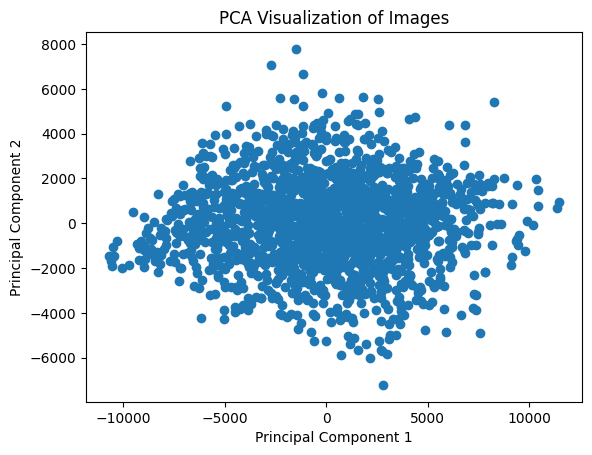

In [ ]:
visualize_pca_images(images)

<ipython-input-21-0b628a8a59b4>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='jet', norm=norm), label='Reconstruction Error')


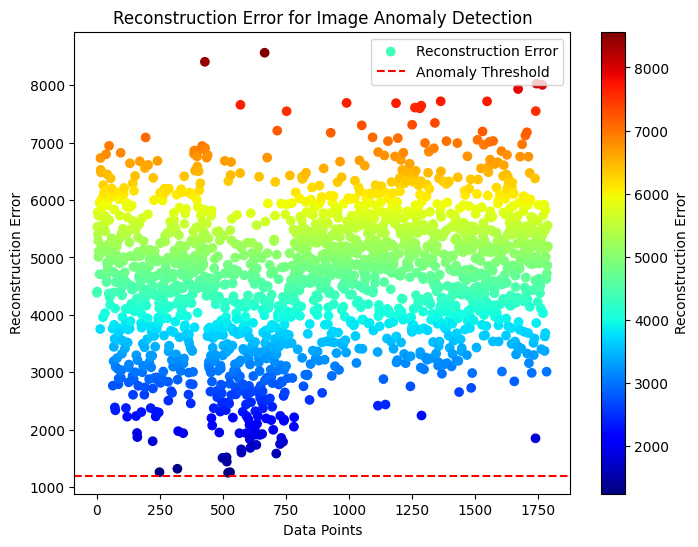

In [ ]:
threshold = 1200
visualize_image_anomaly_detection(images, threshold)

# Object Detection Model Training

<img src='https://cdnb.artstation.com/p/assets/images/images/022/196/993/original/shain-barry-turtle-walk-1.gif?1574464785' alt='how to  a gif to your page' height='350px'>


**Prerequisites**

By now you should have:

*   A dataset;
*   A txt file with the classes




In [ ]:
cat = ['food' , 'makeup' , 'music', 'photographer' , 'sports']
data = {}
for i in range(0 , len(images)):
  img_name = images[i].split('/')[-1].split('.')[0]
  file_extension = images[i].split('/')[-1].split('.')[-1]
  img_cat =  images[i].split('/')[-2]
  print(img_name)
  if file_extension != "jpeg":
    continue
  if img_cat not in data:
    data[img_cat] = {}
  data[img_cat][img_name] = list(detect_objects(images[i],weight_file ,cfg_file ,label_file ))

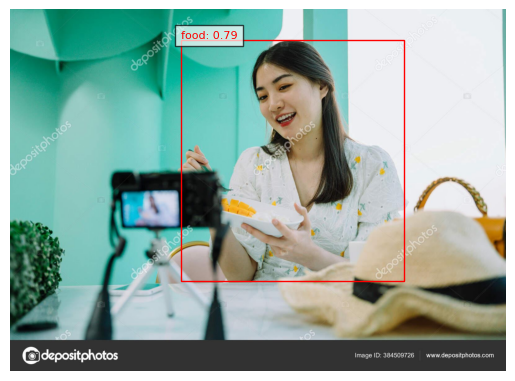

In [ ]:
image_no = 5
bounding_boxes ,confidence_scores , class_ids , classes = detect_objects_for_boundingBox(images[image_no],weight_file ,cfg_file ,label_file )
visualize_bounding_boxes(images[image_no], bounding_boxes, cat, confidence_scores)


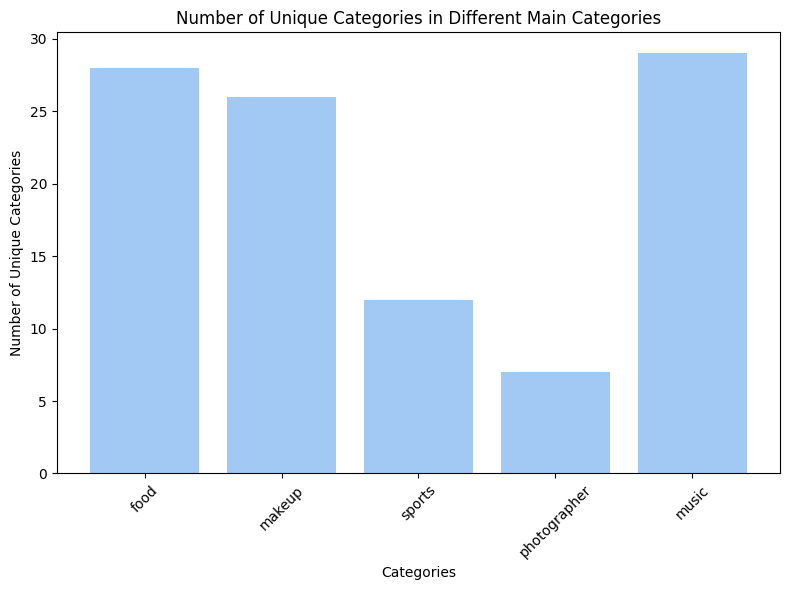

In [ ]:
visualize_category_counts(data)


#**Section 9:** **Implementation and Visualization for Test Data**

In [ ]:
directory_path = '/content/drive/MyDrive/testdata'
images_test = get_images_from_directory(directory_path)

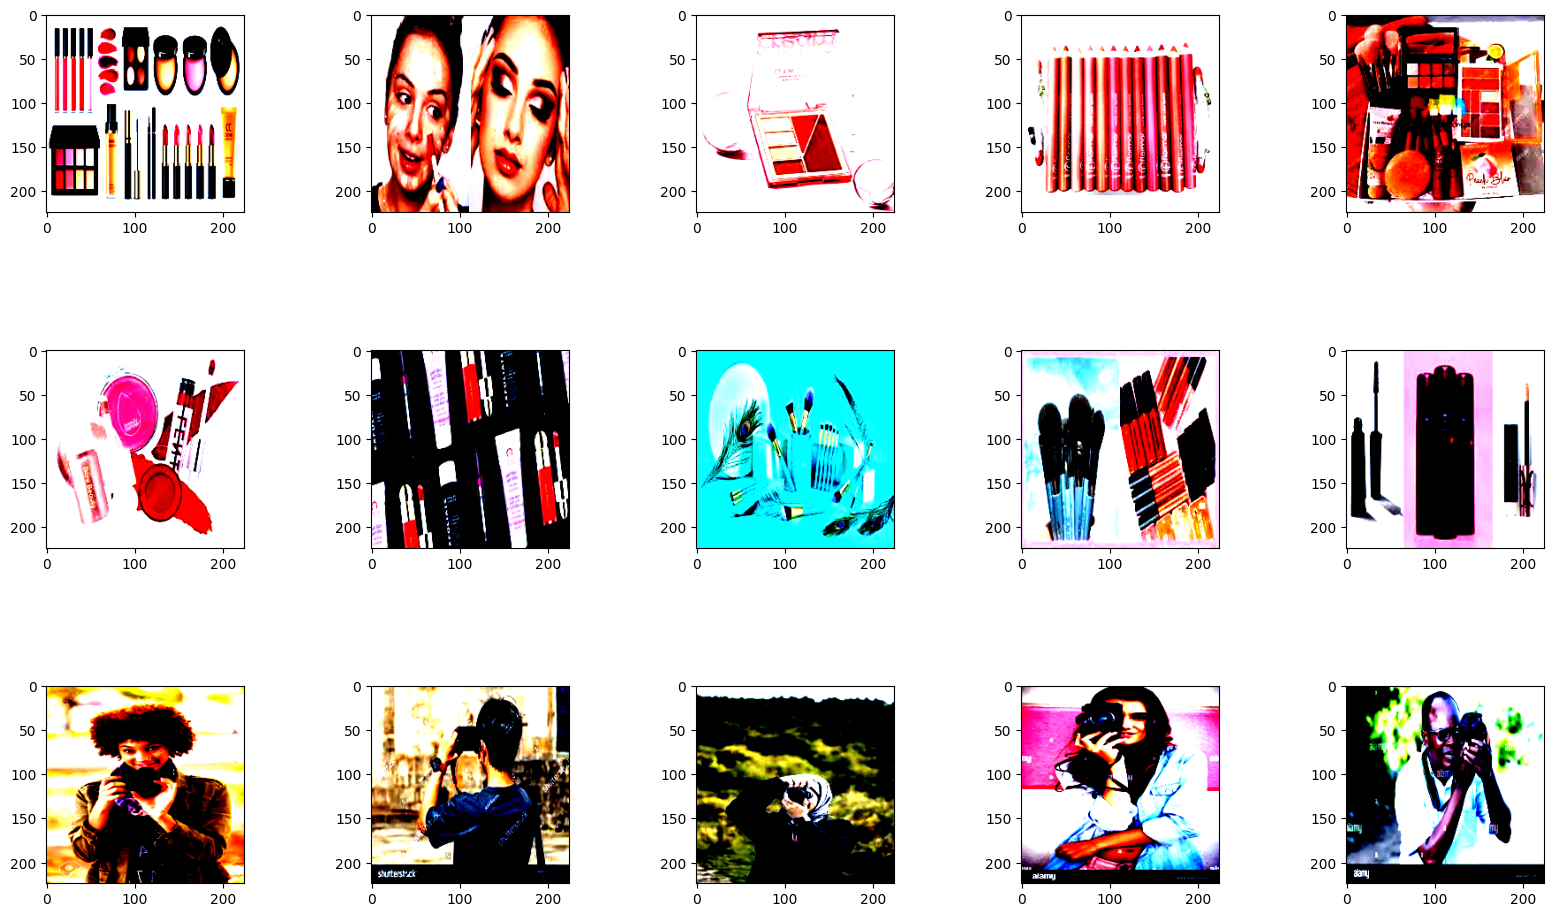

In [ ]:
display_images_inGrid(images_test)

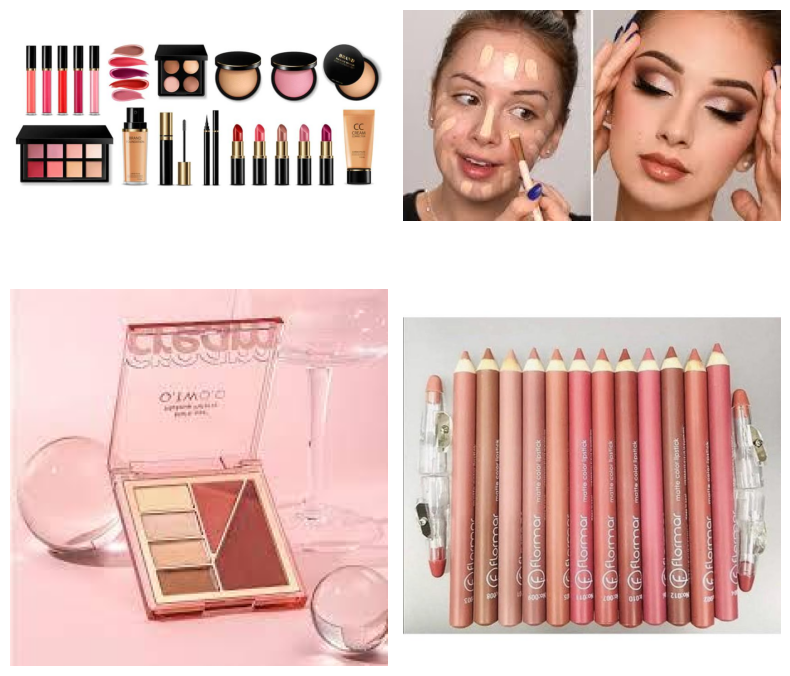

In [ ]:
display_images(images_test)

{'Explained Variance': array([0.32641737, 0.09945479]), 'Cumulative Explained Variance': array([0.32641737, 0.42587216]), 'Component Loadings': array([[-0.01456372, -0.01524792, -0.01539371, ..., -0.01405115,
        -0.01379454, -0.01420096],
       [ 0.01439946,  0.01502478,  0.01481373, ..., -0.01051749,
        -0.00936624, -0.00911399]])}


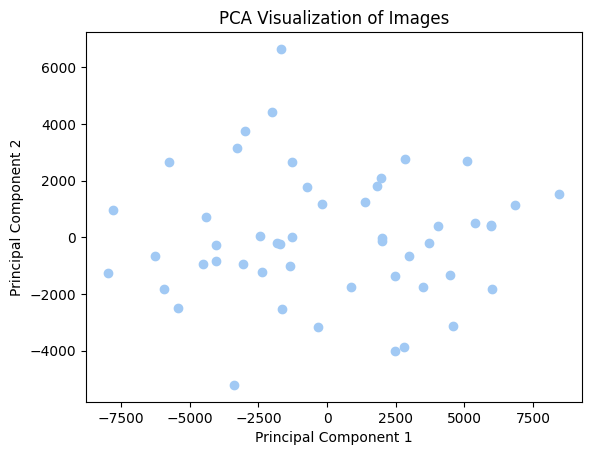

In [ ]:
visualize_pca_images(images_test)

<ipython-input-21-0b628a8a59b4>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='jet', norm=norm), label='Reconstruction Error')


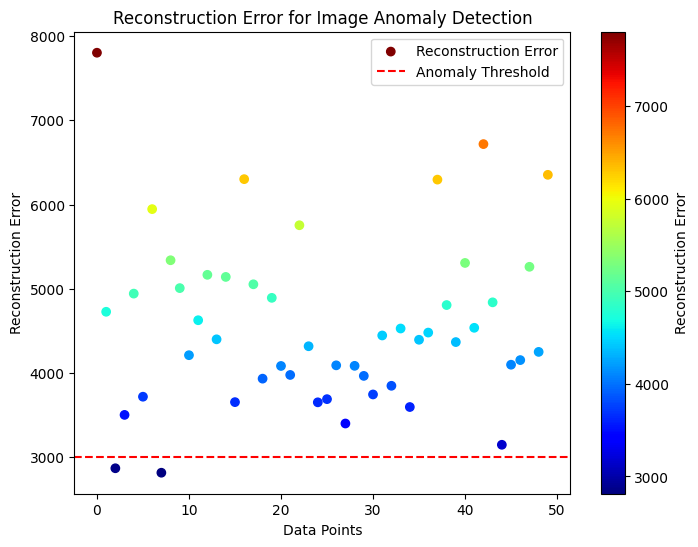

In [ ]:
threshold = 3000
visualize_image_anomaly_detection(images_test, threshold)

In [ ]:
test_data = {}
for i in range(0 , len(images_test)):
  img_name = images_test[i].split('/')[-1].split('.')[0]
  file_extension = images_test[i].split('/')[-1].split('.')[-1]
  img_cat =  images_test[i].split('/')[-2]
  print(img_name)
  if file_extension != "jpeg":
    continue
  if img_cat not in test_data:
    test_data[img_cat] = {}
  test_data[img_cat][img_name] = list(detect_objects(images_test[i],weight_file ,cfg_file ,label_file ))


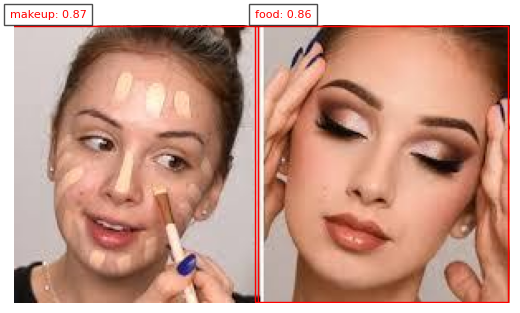

In [ ]:
image_no = 1
bounding_boxes ,confidence_scores , class_ids , classes = detect_objects_for_boundingBox(images_test[image_no],weight_file ,cfg_file ,label_file )
visualize_bounding_boxes(images_test[image_no], bounding_boxes, cat, confidence_scores)

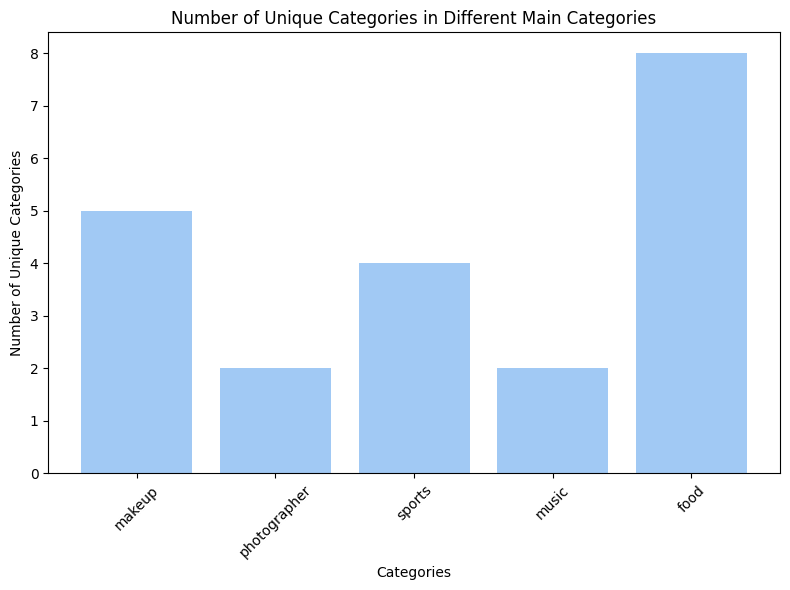

In [ ]:
visualize_category_counts(test_data)

#**Section 10:** **RESULTS**

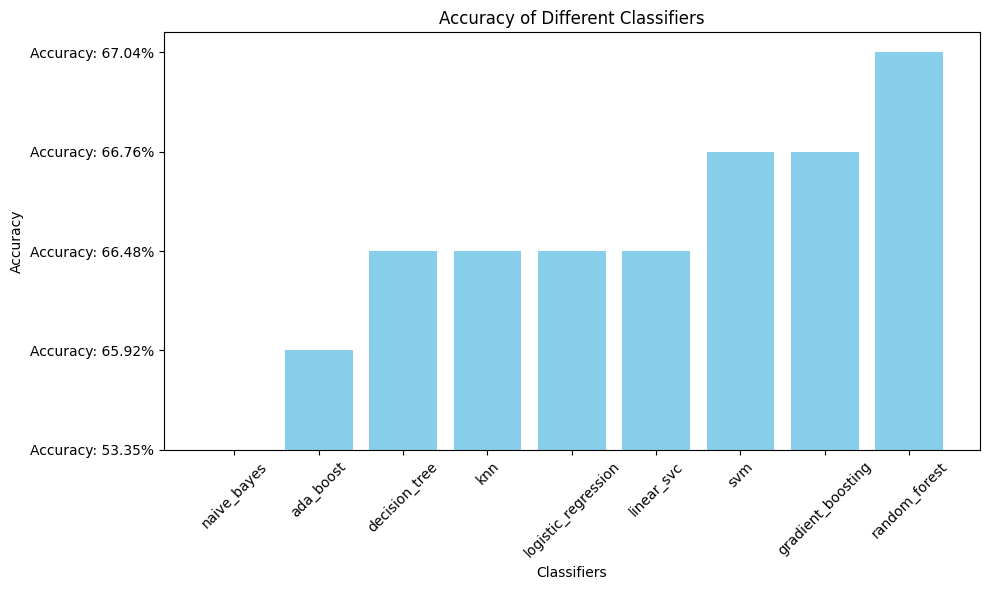

The best classifier is random_forest with an accuracy of Accuracy: 67.04%


In [ ]:

# Using different classifiers
classifiers = [
    'svm', 'naive_bayes', 'decision_tree', 'random_forest', 'knn',
    'logistic_regression', 'ada_boost', 'gradient_boosting', 'linear_svc'
]

results_dict = {}  # Dictionary to store results and accuracy
for classifier in classifiers:
    results, accuracy = predict_category_with_classifier(data, test_data, classifier)
    results_dict[classifier] = {'results': results, 'accuracy': accuracy}

# Sort classifiers based on accuracy (descending order)
sorted_classifiers = sorted(results_dict, key=lambda x: results_dict[x]['accuracy'])
sorted_accuracies = [results_dict[classifier]['accuracy'] for classifier in sorted_classifiers]

plt.figure(figsize=(10, 6))
plt.bar(sorted_classifiers, sorted_accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the best classifier based on the accuracy
best_classifier = sorted_classifiers[len(sorted_classifiers)-1]
print(f"The best classifier is {best_classifier} with an accuracy of {results_dict[best_classifier]['accuracy']}")

# Prediction Of Sports

In [ ]:
img = "/content/221126143352-weston-mckennie.jpg"
result = process_image_and_predict_category(img, weight_file, cfg_file, label_file, data , "sports")
print(result)

{'results': ["The test image sports:221126143352-weston-mckennie is predicted to be in the 'sports' category."], 'accuracy': 'Accuracy: 100.00%'}


# Prediction Of Food

In [ ]:
img = "/content/food-spread.jpg"
result = process_image_and_predict_category(img, weight_file, cfg_file, label_file, data , "food")
print(result)

{'results': ["The test image food:food-spread is predicted to be in the 'food' category."], 'accuracy': 'Accuracy: 100.00%'}


#**Section 11:** **Conclusion**

After examining the YOLO model for object detection, it's evident that this overview only touches the basics. Object detection holds a depth beyond our exploration here.

In addition to our discussion, here are the accuracies achieved by various models:

SVM: 66.76%

Naive Bayes: 53.35%

Decision Tree: 66.20%

Random Forest: 67.04%

KNN: 66.48%

Logistic Regression: 66.76%

AdaBoost: 53.35%

This tutorial has introduced the fundamentals of object detection using YOLO. Remember, there's much more to delve into within this domain.

Thank you for reading.


<img src='https://gifdb.com/images/high/space-force-steve-carell-any-questions-gtwk5bfaw8a2xk5x.gif' alt='how to  a gif to your page' height='350px'>